## San Antonio City Salary Data

Data set by Annie Millrbernd
https://data.world/amillerbernd/san-antonio-city-salary-data

**DESCRIPTION**
Compensation of San Antonio City Employees, 2012-2016. All data provided by the City of San Antonio.
SUMMARY
About this Dataset

Included in these data are all the earnings and some demographic information about city employees.

**Objectives**

Collection, retention, annual presentation

**Background**

1Hire Date reflects the most recent date of hire with the City in the event the employee left employment and was rehired or was a temporary employee and became a full time permanent employee.	
2Annual Salary reflects what the employee's current base salary would be for a year based on the position held at September 30, 2016.	
3Base Pay reflects the regular salary the employee actually earned during the fiscal year regardless of position held. It is possible with position changes, length of time with the City, etc. that an employee's Base Pay will not equal their Annual Salary.	
4Leave Payout reflects leave the employee sold back to the City during the fiscal year. For full-time employees who separated during the fiscal year this may also include accrued leave sold back to the City upon separation.	
5Other reflects various incentives paid to City employees based on their job position and education level. Incentives include but are not limited to education pay; language skill pay; certification pay; car allowance; transportation allowance; cell phone reimbursement; clothing allowance; and shift differential.	
6City policy allows employees to bank overtime hours for future compensated absences.	
7 Gross Earnings reflect the total pay employees received between October 1st and September 30th. 
8Additional Benefits are incremental costs incurred by the City of behalf of employees to include the employer's share of FICA/Medicare, TMRS [Pension], annual Health Assessment [average healthcare benefit costs] and other related fringe provided to employees.	
9Total Compensation reflects the total cost the City incurred for the employee's services received between October 1st and September 30th.	
10Federal law requires the City of San Antonio to keep records of its employees' race/ethnicity and sex and to report this information to the Equal Employment Opportunity Commission (EEOC). The EEOC identifies the acceptable methods for a city or state to acquire this information. The City follows EEOC 
requirements by obtaining the race/ethnicity information from employees through voluntary reporting (self identification) or from visual surveys of its workforce. Therefore, the City cannot guarantee the complete accuracy of this information.

## Key questions: 

### 1. Are there any trends in pay based on gender
### 2. Are there any trends in pay based on race
### 3. What is the biggest city department (based on number of employees)
### 4. What is the most high paying-department (based on total salary)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from datetime import datetime, timedelta

# Function to comvert the "HIRE DATE1" column into usable date format
def from_excel_ordinal(ordinal, epoch=datetime(1900, 1, 1)):
    # Adapted from above, thanks to @Martijn Pieters 

    if ordinal > 59:
        ordinal -= 1  # Excel leap year bug, 1900 is not a leap year!
    inDays = int(ordinal)
    frac = ordinal - inDays
    inSecs = int(round(frac * 86400.0))

    return epoch + timedelta(days=inDays - 1, seconds=inSecs) # epoch is day 1

last_date = "2016-12-31"

datetime.strptime(last_date, '%Y-%m-%d')

datetime.datetime(2016, 12, 31, 0, 0)

In [2]:
city_data = pd.read_excel("FY16 SA City Compensation.xlsx")
city_data["HIRE DATE1"] = city_data["HIRE DATE1"].apply(from_excel_ordinal)

In [3]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11923 entries, 0 to 11922
Data columns (total 18 columns):
REF #                        11923 non-null int64
FIRST NAME                   11923 non-null object
MIDDLE NAME                  6261 non-null object
LAST NAME                    11923 non-null object
HIRE DATE1                   11923 non-null datetime64[ns]
FY16 ANNUAL SALARY2          11923 non-null float64
FY16 BASE PAY3               11923 non-null float64
FY16 LEAVE PAYOUT4           11923 non-null float64
FY16 OTHER5                  11923 non-null float64
FY16 OVERTIME6               11923 non-null float64
FY16 GROSS EARNINGS7         11923 non-null float64
FY16 ADDITIONAL BENEFITS8    11923 non-null float64
FY16 TOTAL COMPENSATION9     11923 non-null float64
JOB TITLE                    11923 non-null object
BUSINESS AREA                11923 non-null object
GENDER                       11923 non-null object
ETHNIC ORIGIN10              11923 non-null object
EMPLOYEE S

In [37]:
city_data = city_data.assign(length_time = datetime.strptime(last_date, '%Y-%m-%d') - city_data["HIRE DATE1"])

In [18]:
(datetime.strptime(last_date, '%Y-%m-%d') - city_data["HIRE DATE1"][0])/np.timedelta64(1, 'Y')

11.148757332457203

In [38]:
city_data.head(1)

,REF #,FIRST NAME,MIDDLE NAME,LAST NAME,HIRE DATE1,FY16 ANNUAL SALARY2,FY16 BASE PAY3,FY16 LEAVE PAYOUT4,FY16 OTHER5,FY16 OVERTIME6,FY16 GROSS EARNINGS7,FY16 ADDITIONAL BENEFITS8,FY16 TOTAL COMPENSATION9,JOB TITLE,BUSINESS AREA,GENDER,ETHNIC ORIGIN10,EMPLOYEE SUBGROUP,length_time
0,1,SHERYL,L.,SCULLEY,2005-11-07,425000.0,414615.38,0.0,97354.89,0.0,511970.27,75379.48,587349.75,1022-CITY MANAGER,CITY MANAGER'S OFFICE,FEMALE,WHITE,2A CITY MGR FT,4072 days


### Q1: Are there any trends in pay based on gender

In [ ]:
city_data.groupby("GENDER")["FY16 TOTAL COMPENSATION9"].count()

In [ ]:
city_data.groupby("GENDER")["FY16 TOTAL COMPENSATION9"].mean().round(0)

In [ ]:
female_mean = round(city_data[city_data.GENDER == "FEMALE"]["FY16 TOTAL COMPENSATION9"].mean(), 1)
male_mean = round(city_data[city_data.GENDER == "MALE"]["FY16 TOTAL COMPENSATION9"].mean(), 1)

In [ ]:
sns.barplot(x="GENDER", y="FY16 TOTAL COMPENSATION9", data=city_data)
plt.title("Mean Income by Gender")
plt.text(
    0,
    40000,
    f'${female_mean}',
    ha='center',
    va='center',
    color='white'
)
plt.text(
    1,
    80000,
    f'${male_mean}',
    ha='center',
    va='center',
    color='white'
       )
plt.text(
    -.2,
    80000,
    f'Difference of ${male_mean - female_mean}',
    color='black'
)

### 2. Are there any trends in pay based on race

In [ ]:
ethnic_columns = city_data[["ETHNIC ORIGIN10", "FY16 TOTAL COMPENSATION9"]]

In [ ]:
plt.figure(figsize=(19,6))
sns.countplot(x="ETHNIC ORIGIN10", data=city_data, orient='v')
plt.xticks(rotation=40, ha="right")
plt.title("Count of individuals by race")

In [ ]:
plt.figure(figsize=(16,9))
sns.barplot(data=city_data, x="ETHNIC ORIGIN10", y="FY16 TOTAL COMPENSATION9")
plt.xticks(rotation = 40, fontsize=6, ha="right")
plt.title("Mean salary by race")
plt.ylabel("Mean Compensation")

In [ ]:
plt.figure(figsize=(16,9))
sns.boxplot(data=city_data, x="ETHNIC ORIGIN10", y="FY16 TOTAL COMPENSATION9")
plt.xticks(rotation = 40, fontsize=6, ha="right")
plt.title("Mean salary by race")
plt.ylabel("Mean Compensation")

### 3. What is the biggest city department (based on number of employees)

In [ ]:
city_data.groupby("BUSINESS AREA")["REF #"].count().sort_values(ascending = False)

In [ ]:
plt.figure(figsize=(16,9))
sns.countplot(data=city_data, x="BUSINESS AREA")
plt.xticks(rotation=45, fontsize=6, ha="right" )

In [ ]:
count_emp = city_data.groupby("BUSINESS AREA")["BUSINESS AREA","REF #"].count().sort_values(by="REF #", ascending=False).head(5)

In [ ]:
count_emp

In [ ]:
sns.barplot(data=count_emp, x="BUSINESS AREA", y=count_emp.index)
plt.title("Number of Employees in the 5 biggest departments")
plt.xlabel("Number of employees")
# plt.text(
#     0,
#     1000,
#     "Police",
#     rotation = 90,
#     color='white',
#     fontsize = 15
# )
# plt.text(
#     1,
#     1000,
#     "Fire",
#     rotation = 90,
#     color='white',
#     fontsize = 15
# )
# plt.text(
#     2,
#     1000,
#     "Human Resources",
#     rotation = 90,
#     color='black',
#     fontsize = 14
    
# )
# plt.text(
#     3,
#     1000,
#     "Transportation",
#     rotation = 90,
#     color='black',
#     fontsize = 13
    
# )
# plt.text(
#     4,
#     1000,
#     "Parks and Rec",
#     rotation = 90,
#     color='black',
#     fontsize = 13
    
# )

### 4. What is the most high paying-department (based on total salary)

In [ ]:
city_data.groupby("BUSINESS AREA")["FY16 TOTAL COMPENSATION9"].sum().round(1).sort_values(ascending=False).head(5)

In [ ]:
plt.figure(figsize=(16,9))
plt.xticks(rotation=45, fontsize=6)
sns.barplot(data=city_data, y="BUSINESS AREA", x="FY16 TOTAL COMPENSATION9", estimator=sum)
plt.title("Total (sum) compensation by Business Area")


In [ ]:
plt.figure(figsize=(16,9))
sns.barplot(data=city_data, y="BUSINESS AREA", x= "FY16 TOTAL COMPENSATION9")
plt.xticks(rotation=45, fontsize=10)
plt.title("Mean compensation by Business Area")

### Top 5 for question 4

In [ ]:
count = city_data.groupby("BUSINESS AREA")["BUSINESS AREA", "FY16 TOTAL COMPENSATION9"].sum().sort_values(by="FY16 TOTAL COMPENSATION9", ascending=False).head(5)
mean_data = city_data.groupby("BUSINESS AREA")["BUSINESS AREA", "FY16 TOTAL COMPENSATION9"].mean().sort_values(by="FY16 TOTAL COMPENSATION9", ascending=False).head(5)

In [ ]:
plt.figure(figsize=(12,10))
plt.suptitle("Compensation by Business Area")

plt.subplot(221)
sns.barplot(data=mean_data, x=mean_data.index, y="FY16 TOTAL COMPENSATION9")
plt.xticks(rotation=45, fontsize=10, ha="right")
plt.title("Mean compensation for top 5 business areas")
# plt.yscale("log")

plt.subplot(222)
sns.barplot(data=count, x=count.index, y="FY16 TOTAL COMPENSATION9")
plt.xticks(rotation=45, fontsize=10, ha="right")
plt.title("Total compensation in top 5 business areas")


plt.subplots_adjust(hspace=0.4)

# Future Questions

* How has compensation changed over time (different data sets going all the way back to 2012? But separate sheets so would need to figure out a way to join them. 

* Compare the pay for gender based on matching positions. 

* Which department had the most overtime / which one had the most leave payout. 

* Are there any trends or correlation as to which departments have the best base salaries, versus which have higher bonuses or other forms of rewards. 

# Potential Fixes

- Add the x ticks inside the bars to make them a little bit easier to see

In [174]:
jobs = city_data.pivot_table('FY16 TOTAL COMPENSATION9', ["BUSINESS AREA", "JOB TITLE"], "GENDER", aggfunc='sum')

In [175]:
jobs = jobs.dropna()

In [176]:
jobs

GENDER                                                                       FEMALE  \
BUSINESS AREA                   JOB TITLE                                             
ANIMAL CARE SERVICES            0209-VETERINARY TECHNICIAN            241767.278309   
                                0213-VETERINARIAN                     121717.860328   
                                0221-ANIMAL CARE SUPERVISOR           186056.089554   
                                0223-ANIMAL CARE OFFICER              654943.121557   
                                0226-ANIMAL CARE ATTENDANT            295828.509302   
...                                                                             ...   
TRANSPORTATION & CAPITAL IMPROV 7250-TCI OPERATIONS SUPERINTENDENT    104865.738707   
                                7275-UTILITY COORDINATOR               68366.278755   
                                7420-SENIOR EQUIPMENT OPERATOR         61585.962578   
                                7579-MAINTENANCE WORKER               179578.007779   
                                7790-FLEET MAINTENANCE TECHNICIAN II   40556.057489   

GENDER                                                                        MALE  
BUSINESS AREA                   JOB TITLE                                           
ANIMAL CARE SERVICES            0209-VETERINARY TECHNICIAN            2.081221e+05  
                                0213-VETERINARIAN                     1.310433e+05  
                                0221-ANIMAL CARE SUPERVISOR           4.231328e+05  
                                0223-ANIMAL CARE OFFICER              6.402501e+05  
                                0226-ANIMAL CARE ATTENDANT            4.483207e+05  
...                                                                            ...  
TRANSPORTATION & CAPITAL IMPROV 7250-TCI OPERATIONS SUPERINTENDENT    7.476607e+05  
                                7275-UTILITY COORDINATOR              5.363687e+04  
                                7420-SENIOR EQUIPMENT OPERATOR        5.826190e+06  
                                7579-MAINTENANCE WORKER               4.184276e+06  
                                7790-FLEET MAINTENANCE TECHNICIAN II  3.327953e+04  

[441 rows x 2 columns]

In [177]:
total_avg = jobs.mean()

In [178]:
total_avg

GENDER
FEMALE    3.829613e+05
MALE      1.469320e+06
dtype: float64

In [179]:
mean = jobs.groupby("BUSINESS AREA").mean()

mean = mean.assign(DIFF = mean["MALE"] - mean["FEMALE"]).sort_values(by="DIFF")
cnt = mean["DIFF"] > 0

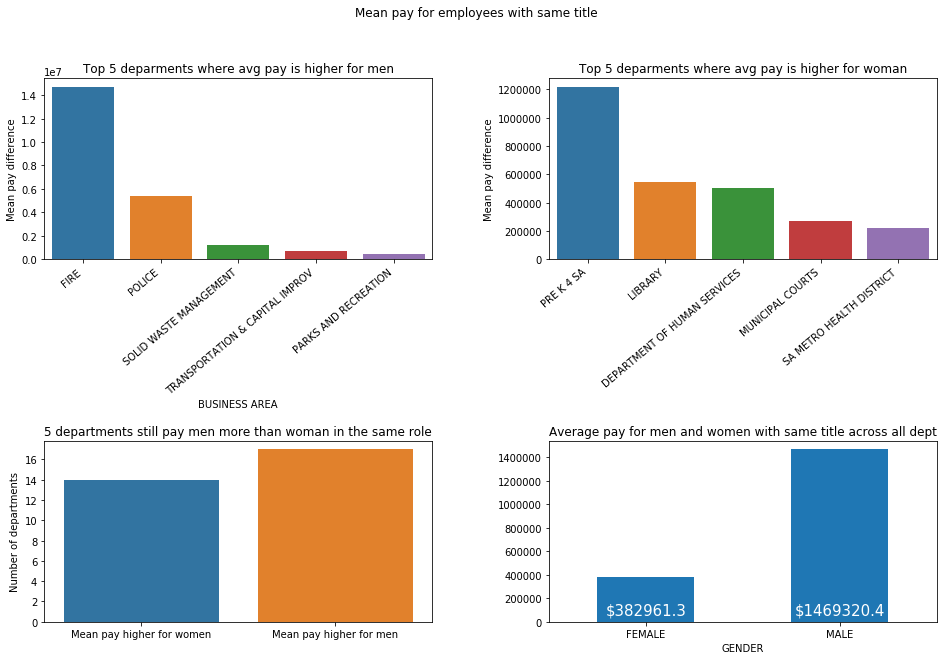

In [180]:
top_5 = mean.nlargest(5, "DIFF")

bottom_5 = mean.nsmallest(5,"DIFF")

plt.figure(figsize=(16,10))
plt.suptitle("Mean pay for employees with same title")

plt.subplot(221)
sns.barplot(data=top_5, x=top_5.index, y="DIFF")
plt.xticks(rotation=40, ha="right")
plt.title("Top 5 deparments where avg pay is higher for men")
plt.ylabel("Mean pay difference")


plt.subplot(222)
sns.barplot(data=bottom_5, x=bottom_5.index, y=bottom_5["DIFF"].abs())
plt.xticks(rotation=40, ha="right")
plt.title("Top 5 deparments where avg pay is higher for woman")
plt.ylabel("Mean pay difference")
plt.xlabel("")

plt.sharey=True

ax = plt.subplot(223)
sns.countplot(data=cnt, x=cnt.index)
plt.ylabel("Number of departments")
ax.set_xticklabels(["Mean pay higher for women", "Mean pay higher for men"])
plt.xlabel("")
plt.title("5 departments still pay men more than woman in the same role")

plt.subplot(224)
total_avg.plot.bar()
plt.title("Average pay for men and women with same title across all dept")
plt.xticks(rotation=0, ha="center")
plt.text(
    0,
    60000,
    f"${jobs.mean()[0].round(1)}",
    color = 'white',
    fontsize = 15,
    ha ="center"
)
plt.text(
    1,
    60000,
    f"${jobs.mean()[1].round(1)}",
    color = 'white',
    fontsize = 15,
    ha ="center"
)


plt.subplots_adjust(hspace=1, wspace = .3)


In [ ]:
bottom_5

In [ ]:
city_data.head()

In [ ]:
city_data[city_data["BUSINESS AREA"] == "NON DEPARTMENTAL"].pivot_table('FY16 TOTAL COMPENSATION9', ["BUSINESS AREA", "JOB TITLE"], "GENDER").dropna()

Looking at the mean per job - with a filter of similar length of hire-date

In [165]:
city_data["legnth_time"] = city_data["length_time"]/ pd.Timedelta(1, unit='d')

dates = city_data.pivot_table('legnth_time', ["BUSINESS AREA", "JOB TITLE"], "GENDER", aggfunc="sum")

dates = dates.dropna()

In [166]:
n_days = 1826
n_days_above_x = city_data["legnth_time"] >= n_days

In [167]:
city_data_w_dates = city_data[n_days_above_x]

In [169]:
jobs_w_dates = city_data_w_dates.pivot_table('FY16 TOTAL COMPENSATION9', ["BUSINESS AREA", "JOB TITLE"], "GENDER", aggfunc="sum")

In [173]:
jobs_w_dates

GENDER                                                                     FEMALE  \
BUSINESS AREA                   JOB TITLE                                           
ANIMAL CARE SERVICES            0209-VETERINARY TECHNICIAN          241767.278309   
                                0221-ANIMAL CARE SUPERVISOR          75652.438590   
                                0223-ANIMAL CARE OFFICER            109662.214450   
                                0226-ANIMAL CARE ATTENDANT           99662.881302   
                                2111-ANIMAL CARE SPECIALIST          57605.947867   
...                                                                           ...   
TRANSPORTATION & CAPITAL IMPROV 2219-SENIOR ACCOUNTANT              147662.546195   
                                2220-ACCOUNTANT                     346093.012057   
                                7250-TCI OPERATIONS SUPERINTENDENT  104865.738707   
                                7420-SENIOR EQUIPMENT OPERATOR       61585.962578   
                                7579-MAINTENANCE WORKER              95052.923779   

GENDER                                                                      MALE  
BUSINESS AREA                   JOB TITLE                                         
ANIMAL CARE SERVICES            0209-VETERINARY TECHNICIAN          1.150398e+05  
                                0221-ANIMAL CARE SUPERVISOR         3.599852e+05  
                                0223-ANIMAL CARE OFFICER            3.123433e+05  
                                0226-ANIMAL CARE ATTENDANT          3.579973e+05  
                                2111-ANIMAL CARE SPECIALIST         1.166734e+05  
...                                                                          ...  
TRANSPORTATION & CAPITAL IMPROV 2219-SENIOR ACCOUNTANT              7.861777e+04  
                                2220-ACCOUNTANT                     5.356554e+04  
                                7250-TCI OPERATIONS SUPERINTENDENT  7.476607e+05  
                                7420-SENIOR EQUIPMENT OPERATOR      5.099186e+06  
                                7579-MAINTENANCE WORKER             2.530251e+06  

[298 rows x 2 columns]

In [170]:
jobs_w_dates = jobs_w_dates.dropna()

In [171]:
mean_w_dates = jobs_w_dates.groupby("BUSINESS AREA").mean()

mean_w_dates = mean_w_dates.assign(DIFF = mean_w_dates["MALE"] - mean_w_dates["FEMALE"]).sort_values(by="DIFF")
cnt_w_dates = mean["DIFF"] > 0

total_avg_w_dates = jobs_w_dates.mean()

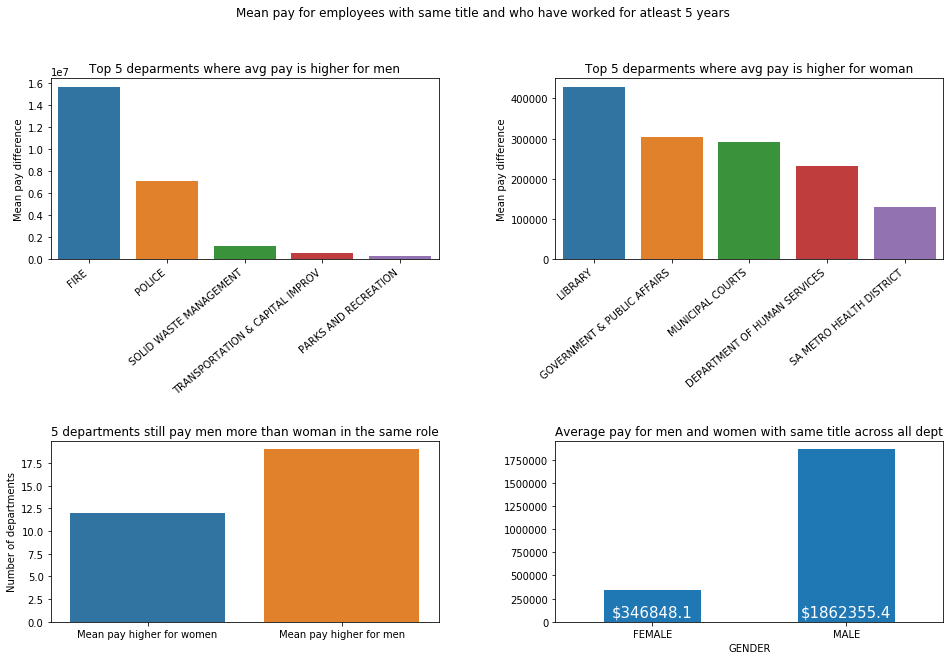

In [172]:
top_5_w_dates = mean_w_dates.nlargest(5, "DIFF")

bottom_5_w_dates = mean_w_dates.nsmallest(5,"DIFF")

plt.figure(figsize=(16,10))
plt.suptitle("Mean pay for employees with same title and who have worked for atleast 5 years")

plt.subplot(221)
sns.barplot(data=top_5_w_dates, x=top_5_w_dates.index, y="DIFF")
plt.xticks(rotation=40, ha="right")
plt.title("Top 5 deparments where avg pay is higher for men")
plt.ylabel("Mean pay difference")
plt.xlabel('')


plt.subplot(222)
sns.barplot(data=bottom_5_w_dates, x=bottom_5_w_dates.index, y=bottom_5_w_dates["DIFF"].abs())
plt.xticks(rotation=40, ha="right")
plt.title("Top 5 deparments where avg pay is higher for woman")
plt.ylabel("Mean pay difference")
plt.xlabel("")

plt.sharey=True

ax = plt.subplot(223)
sns.countplot(data=cnt_w_dates, x=cnt_w_dates.index)
plt.ylabel("Number of departments")
ax.set_xticklabels(["Mean pay higher for women", "Mean pay higher for men"])
plt.xlabel("")
plt.title("5 departments still pay men more than woman in the same role")

plt.subplot(224)
total_avg_w_dates.plot.bar()
plt.title("Average pay for men and women with same title across all dept")
plt.xticks(rotation=0, ha="center")
plt.text(
    0,
    60000,
    f"${jobs_w_dates.mean()[0].round(1)}",
    color = 'white',
    fontsize = 15,
    ha ="center"
)
plt.text(
    1,
    60000,
    f"${jobs_w_dates.mean()[1].round(1)}",
    color = 'white',
    fontsize = 15,
    ha ="center"
)


plt.subplots_adjust(hspace=1, wspace = .3)

## What if I wanted to show pay difference by gender over number of years

I can maybe create a crosstab with hire date and full compensation, then graph it by grouping by time.

In [184]:
dates_jobs = city_data.pivot_table(["legnth_time",'FY16 TOTAL COMPENSATION9'], ["BUSINESS AREA", "JOB TITLE"], "GENDER", aggfunc="sum").dropna()

In [196]:
city_data.pivot_table(["legnth_time",'FY16 TOTAL COMPENSATION9'], ["BUSINESS AREA", "JOB TITLE"], aggfunc="sum")

FY16 TOTAL COMPENSATION9  \
BUSINESS AREA                   JOB TITLE                                                        
ANIMAL CARE SERVICES            0042-SENIOR ADMINISTRATIVE ASSISTANT              7.567918e+04   
                                0046-MANAGEMENT ANALYST                           5.924846e+04   
                                0080-PUBLIC RELATIONS MANAGER                     9.407660e+04   
                                0156-CONTRACT COORDINATOR                         7.821806e+04   
                                0205-CHIEF VETERINARIAN                           1.643283e+05   
...                                                                                        ...   
TRANSPORTATION & CAPITAL IMPROV 7579-MAINTENANCE WORKER                           4.363854e+06   
                                7680-CARPENTER II                                 1.738604e+05   
                                7750-WELDER                                       2.369522e+05   
                                7790-FLEET MAINTENANCE TECHNICIAN II              7.383559e+04   
                                7990-CONCRETE FINISHER                            4.156181e+05   

                                                                      legnth_time  
BUSINESS AREA                   JOB TITLE                                          
ANIMAL CARE SERVICES            0042-SENIOR ADMINISTRATIVE ASSISTANT      11457.0  
                                0046-MANAGEMENT ANALYST                     467.0  
                                0080-PUBLIC RELATIONS MANAGER              3764.0  
                                0156-CONTRACT COORDINATOR                  1412.0  
                                0205-CHIEF VETERINARIAN                    1789.0  
...                                                                           ...  
TRANSPORTATION & CAPITAL IMPROV 7579-MAINTENANCE WORKER                  332253.0  
                                7680-CARPENTER II                         22035.0  
                                7750-WELDER                               21073.0  
                                7790-FLEET MAINTENANCE TECHNICIAN II        766.0  
                                7990-CONCRETE FINISHER                    22597.0  

[1496 rows x 2 columns]